__Group Members:__
1. Praneet Kumar Alamuri (EID: pa2222)
2. Meeth Yogesh Handa (EID: mh58668)
3. Sai Bhargav Tetali (EID: srt2578)
4. James Anderson (EID: ja47823)

In [1]:
import numpy as np
import gurobipy as gp
import pandas as pd

# Part 1

In [2]:
#reading in the two sets of RoI data
df = pd.read_csv("ROI_data.csv")
columns = df.columns[1:]
df

,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


In [3]:
# reading in the ROI data provided by the first company into a list
roi1 = []
for i in range(1,len(df.columns)):
    roi1.append(df.iloc[0,i])

In [4]:
# Converting the roi list to numpy array for defining objective function
obj = np.array(roi1)
obj

array([0.031, 0.049, 0.024, 0.039, 0.016, 0.024, 0.046, 0.026, 0.033,
       0.044])

In [5]:
# Storing the original media channel names in variables in order to define constraints later
col1_name = "Print"
col2_name = "TV"
col3_name = "SEO"
col4_name = "AdWords"
col5_name = "Facebook"
col6_name = "LinkedIn"
col7_name = "Instagram"
col8_name = "Snapchat"
col9_name = "Twitter"
col10_name = "Email"

In [6]:
# Getting the index value for all the original media channels to define the constraints even if more channels are added later
index_no1 = df.columns.get_loc(col1_name)
index_no2 = df.columns.get_loc(col2_name)
index_no3 = df.columns.get_loc(col3_name)
index_no4 = df.columns.get_loc(col4_name)
index_no5 = df.columns.get_loc(col5_name)
index_no6 = df.columns.get_loc(col6_name)
index_no7 = df.columns.get_loc(col7_name)
index_no8 = df.columns.get_loc(col8_name)
index_no9 = df.columns.get_loc(col9_name)
index_no10 = df.columns.get_loc(col10_name)

In [7]:
A = np.zeros((3,len(df.columns)-1)) # initialize constraint matrix
A[0,:] = 1 # total budget constraint (Total budget < 10m)

# Part 2

2. a)

In [8]:
# Constraint a: The amount invested in Print and TV should be no more than amount spent on Facebook and Email
A[1,index_no1-1] = 1
A[1,index_no2-1] = 1
A[1,index_no5-1] = -1
A[1,index_no10-1] = -1

2. b)

In [9]:
# Constraint b: The total amount spent in social media (Facebook, LinkedIn, Instagram, Snapchat, Twitter) 
# should be at least twice of SEO and AdWords
A[2,index_no3-1] = -2
A[2,index_no4-1] = -2
A[2,index_no5-1] = 1
A[2,index_no6-1] = 1
A[2,index_no7-1] = 1
A[2,index_no8-1] = 1
A[2,index_no9-1] = 1

In [10]:
b = np.array([10000000,0,0]) # right side(RHS) of the inequalities
sense = np.array(['<','<','>']) # inequalities vector 

In [11]:
ojModel = gp.Model() # initialize an empty model
# Constraint c: For each platform, the amount invested should be no more than $3m
ojModX = ojModel.addMVar(len(df.columns)-1, ub=np.ones(len(df.columns)-1)*3000000) #initialize x variables and give upper bound of 3,000,000$

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-17


# Part 3

In [12]:
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)
ojModel.Params.OutputFlag = 0 
ojModel.Params.TimeLimit = 3600
ojModel.optimize() # solve the LP

In [13]:
# creating a dataframe and storing the allocations and RoI in the dataframe
df_dist = pd.DataFrame(columns = columns)
df_dist.loc['Case 1 - All constraints and RoI 1'] = ojModX.x
df_dist['Total_RoI'] = ojModel.objVal
df_dist

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Total_RoI
Case 1 - All constraints and RoI 1,0.0,3000000.0,0.0,1000000.0,0.0,0.0,3000000.0,0.0,0.0,3000000.0,456000.0


# Part 4

In [14]:
# reading in the ROI data provided by the second company into a list
roi2 = []
for i in range(1,len(df.columns)):
    roi2.append(df.iloc[1,i])

In [15]:
# Converting the roi list to numpy array for defining objective function
obj2 = np.array(roi2)
obj2

array([0.049, 0.023, 0.024, 0.039, 0.044, 0.046, 0.026, 0.019, 0.037,
       0.026])

In [16]:
# solving the same LP but this time considering the second RoI data
ojModel_2 = gp.Model() # initialize an empty model
ojModX_2 = ojModel_2.addMVar(len(df.columns)-1, ub=np.ones(len(df.columns)-1)*3000000)
ojModCon_2 = ojModel_2.addMConstrs(A, ojModX_2, sense, b)
ojModel_2.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE)
ojModel_2.Params.OutputFlag = 0 
ojModel_2.Params.TimeLimit = 3600
ojModel_2.optimize() # solve the LP

In [17]:
#adding the allocations and RoI to the previously created dataframe so that comparison will be easier
row_2 = np.append(ojModX_2.x,ojModel_2.objVal)
df_dist.loc['Case 2 - All constraints and RoI 2'] = row_2
df_dist

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Total_RoI
Case 1 - All constraints and RoI 1,0.0,3000000.0,0.0,1000000.0,0.0,0.0,3000000.0,0.0,0.0,3000000.0,456000.0
Case 2 - All constraints and RoI 2,3000000.0,0.0,0.0,1000000.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,456000.0


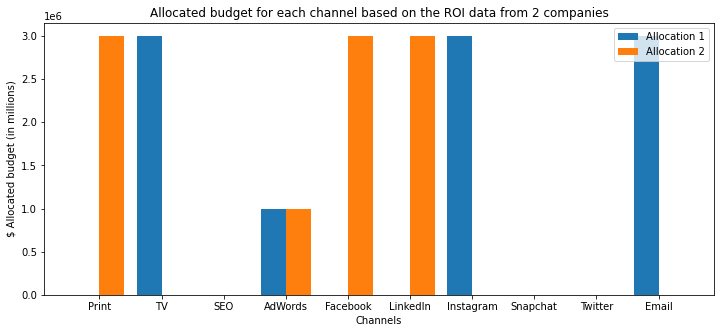

In [18]:
#plotting the allocations obtained using the two different sets of ROI data for visualization and easy interpretation

import matplotlib.pyplot as plt

X = df.columns[1:]
X_axis = np.arange(len(X))

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(5)
plt.bar(X_axis - 0.2, ojModX.x, 0.4, label = 'Allocation 1')
plt.bar(X_axis + 0.2, ojModX_2.x, 0.4, label = 'Allocation 2')
plt.xticks(X_axis, X)
plt.xlabel("Channels")
plt.ylabel("$ Allocated budget (in millions)")
plt.title("Allocated budget for each channel based on the ROI data from 2 companies")
plt.legend()
plt.show()

# Part 5

In [19]:
# comparing the allocations obtained from the two sets of ROI data and printing out whether they are same or not
compare = ojModX.x != ojModX_2.x
are_arrays_equal = compare.all()

if (are_arrays_equal):
    print("The allocations obtained from the two different sets of ROI data are same.")
else:
    print("The allocations obtained from the two different sets of ROI data are not same.")

The allocations obtained from the two different sets of ROI data are not same.


In [42]:
print("If first RoI data is correct but we use the second allocations we end up with lower amount by the following value: ",ojModel.objVal - ojModX_2.x @ obj)

If first RoI data is correct but we use the second allocations we end up with lower amount by the following value:  204000.0


In [43]:
print("If second RoI data is correct but we use the first allocations we end up with lower amount by the following value: ",ojModel_2.objVal - ojModX.x @ obj2)

If second RoI data is correct but we use the first allocations we end up with lower amount by the following value:  192000.0


In [22]:
#solving the LP with first RoI data but without the constraint of $3,000,000
ojModel_3 = gp.Model() # initialize an empty model
ojModX_3 = ojModel_3.addMVar(len(df.columns)-1)
ojModCon_3 = ojModel_3.addMConstrs(A, ojModX_3, sense, b)
ojModel_3.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)
ojModel_3.Params.OutputFlag = 0 
ojModel_3.Params.TimeLimit = 3600
ojModel_3.optimize() # solve the LP

In [23]:
#adding the allocations and RoI to the previously created dataframe so that comparison will be easier
row_3 = np.append(ojModX_3.x,ojModel_3.objVal)
df_dist.loc['Case 3 - No upper limit on media and RoI 1'] = row_3
df_dist

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Total_RoI
Case 1 - All constraints and RoI 1,0.0,3000000.0,0.0,1000000.0,0.0,0.0,3000000.0,0.0,0.0,3000000.0,456000.0
Case 2 - All constraints and RoI 2,3000000.0,0.0,0.0,1000000.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,456000.0
Case 3 - No upper limit on media and RoI 1,0.0,5000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000000.0,465000.0


In [24]:
#solving the LP with second RoI data but without the constraint of $3,000,000
ojModel_4 = gp.Model() # initialize an empty model
ojModX_4 = ojModel_4.addMVar(len(df.columns)-1)
ojModCon_4 = ojModel_4.addMConstrs(A, ojModX_4, sense, b)
ojModel_4.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE)
ojModel_4.Params.OutputFlag = 0 
ojModel_4.Params.TimeLimit = 3600
ojModel_4.optimize() # solve the LP

In [25]:
#adding the allocations and RoI to the previously created dataframe so that comparison will be easier
row_4 = np.append(ojModX_4.x,ojModel_4.objVal)
df_dist.loc['Case 4 - No upper limit on media and RoI 2'] = row_4
df_dist

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Total_RoI
Case 1 - All constraints and RoI 1,0.0,3000000.0,0.0,1000000.0,0.0,0.0,3000000.0,0.0,0.0,3000000.0,456000.0
Case 2 - All constraints and RoI 2,3000000.0,0.0,0.0,1000000.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,456000.0
Case 3 - No upper limit on media and RoI 1,0.0,5000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000000.0,465000.0
Case 4 - No upper limit on media and RoI 2,5000000.0,0.0,0.0,0.0,5000000.0,0.0,0.0,0.0,0.0,0.0,465000.0


In [26]:
print("If first RoI data is correct but we use the fourth allocations(obtained by optimising without the $3M constraint \
and second RoI data) we end up with lower amount by the following value:", ojModel_3.objVal - ojModX_4.x @ obj)

If first RoI data is correct but we use the fourth allocations(obtained by optimising without the $3M constraint and second RoI data) we end up with lower amount by the following value: 230000.0


In [27]:
print("If second RoI data is correct but we use the third allocations(obtained by optimising without the $3M constraint \
and first RoI data) we end up with lower amount by the following value:",ojModel_4.objVal - ojModX_3.x @ obj2)

If second RoI data is correct but we use the third allocations(obtained by optimising without the $3M constraint and first RoI data) we end up with lower amount by the following value: 220000.0


In [28]:
print("The RoI we get if first RoI data is correct but we used second allocation:",ojModX_2.x @ obj)

The RoI we get if first RoI data is correct but we used second allocation: 252000.0


In [29]:
print("The RoI we get if second RoI data is correct but we used first allocation:",ojModX.x @ obj2 )

The RoI we get if second RoI data is correct but we used first allocation: 264000.0


In [30]:
print("The RoI we get if first RoI data is correct but we used fourth allocation(obtained by \
optimising without the $3M constraint and second RoI data):",ojModX_4.x @ obj )

The RoI we get if first RoI data is correct but we used fourth allocation(obtained by optimising without the $3M constraint and second RoI data): 235000.0


In [31]:
print("The RoI we get if second RoI data is correct but we used third allocation(obtained by \
optimising without the $3M constraint and first RoI data):",ojModX_3.x @ obj2)

The RoI we get if second RoI data is correct but we used third allocation(obtained by optimising without the $3M constraint and first RoI data): 245000.0


By observing the above values we notice that without the third constraint of 3,000,000 we get higher RoI of 465,000 as opposed to 456,000. So, at first look we might think the third constraint is useless. But, if we look at the RoIs we get if at all we were wrong about the RoI data we get higher values if we keep the third constraint. So, by keeping the third constraint we are playing a safe game.

# Part 6

In [32]:
print("Lower bounds of the first RoI data which will still result in the first allocation:",ojModX.SAObjLow,"\n")

for i in range(0,len(df_dist.columns)-1):
    variance = obj[i] - ojModX.SAObjLow[i]
    print(df_dist.columns[i],"can decrease by",variance,"without changing optimal allocation")

Lower bounds of the first RoI data which will still result in the first allocation: [ -inf 0.039  -inf 0.033  -inf  -inf 0.039  -inf  -inf 0.029] 

Print can decrease by inf without changing optimal allocation
TV can decrease by 0.010000000000000002 without changing optimal allocation
SEO can decrease by inf without changing optimal allocation
AdWords can decrease by 0.005999999999999998 without changing optimal allocation
Facebook can decrease by inf without changing optimal allocation
LinkedIn can decrease by inf without changing optimal allocation
Instagram can decrease by 0.006999999999999999 without changing optimal allocation
Snapchat can decrease by inf without changing optimal allocation
Twitter can decrease by inf without changing optimal allocation
Email can decrease by 0.015 without changing optimal allocation


In [33]:
print("Upper bounds of the first RoI data which will still result in the first allocation:",ojModX.SAObjUp,"\n")

for i in range(0,len(df_dist.columns)-1):
    variance = ojModX.SAObjUp[i] - obj[i]
    print(df_dist.columns[i],"can increase by",variance,"without changing optimal allocation")

Upper bounds of the first RoI data which will still result in the first allocation: [0.049 0.062 0.039 0.046 0.029 0.039   inf 0.039 0.039   inf] 

Print can increase by 0.018000000000000002 without changing optimal allocation
TV can increase by 0.012999999999999998 without changing optimal allocation
SEO can increase by 0.015 without changing optimal allocation
AdWords can increase by 0.006999999999999999 without changing optimal allocation
Facebook can increase by 0.012999999999999998 without changing optimal allocation
LinkedIn can increase by 0.015 without changing optimal allocation
Instagram can increase by inf without changing optimal allocation
Snapchat can increase by 0.013000000000000001 without changing optimal allocation
Twitter can increase by 0.005999999999999998 without changing optimal allocation
Email can increase by inf without changing optimal allocation


# Part 7

In [34]:
# reading in the 12 months RoI data
df_mat = pd.read_csv("roi_mat.csv")
obj_mat = df_mat.to_numpy() # converting from dataframe to numpy array to use in the next steps
df_mat.columns.values[0] = 'Month'
channel_no = len(df_mat.columns)-1# storing the number of channels
months_no = np.shape(obj_mat)[0]
df_mat

,Month,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
5,June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
6,July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
7,August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
8,September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
9,October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


We can do optimise the problem in two ways
 
 - Optimising for each month separately. In this case we can use loops to go through each month and optimise for each month by changing the total budget for each month from the previous months RoIs.

 - Take all months together and solve for 10x12 = 120 variables at one go. (This method is cumbersome but if we have a constraint where one months values are going to affect another months values(for example, the constraint given in Q8 for stable budget where the difference between the values in subsequent months should not be greater than $1,000,000) this method will be useful)
 
Both of the abovementioned methods are going to be displayed below

In [35]:
b_mat = np.zeros(3)# for each loop we are going to optimize for only one month for which there will be 3 constraints
b_mat[0] = 10000000# budget constraint for the fisrt month

RoI_1 = [] # to store the monthly RoI values
allocation_1 = [] # to store the monthly allocations
investment_1 = [] # to store the monthly budgets

for i in range(months_no):
    ojModel_x = gp.Model() # initialize an empty model
    ojModX_x = ojModel_x.addMVar(channel_no, ub=np.ones(channel_no)*3000000)
    ojModCon_x = ojModel_x.addMConstrs(A, ojModX_x, sense, b_mat)
    ojModel_x.setMObjective(None,obj_mat[i,1:]/100,0,sense=gp.GRB.MAXIMIZE)
    ojModel_x.Params.OutputFlag = 0 
    ojModel_x.Params.TimeLimit = 3600
    ojModel_x.optimize()# solve the LP
    investment_1.append(b_mat[0])
    RoI_1.append(ojModel_x.objVal)
    allocation_1.append(ojModX_x.x)
    b_mat[0] = b_mat[0] + ojModel_x.objVal/2 # updating our budget for the next month(assuming cumulative increase)
    #b_mat[0] = 10000000 + ojModel_x.objVal/2 # updating our budget for the next month(assuming only last month RoI)

print("Optimal allocation for each month:")
# storing all the values in dataframe
df_mat_result = pd.DataFrame(data = allocation_1, columns = columns)
df_mat_result.set_index(df_mat['Month'],inplace = True)
df_mat_result.insert(0,'Total_Investment', investment_1 )
df_mat_result['RoI'] = RoI_1
df_mat_result

Optimal allocation for each month:


,Total_Investment,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,RoI
Month,,,,,,,,,,,,
January,1.000000e+07,3.000000e+06,0.0,0.0,1.333333e+06,0.000000e+00,0.000000e+00,2.666667e+06,0.0,0.000000e+00,3.000000e+06,373000.000000
February,1.018650e+07,3.000000e+06,0.0,0.0,2.395500e+06,3.000000e+06,0.000000e+00,0.000000e+00,0.0,1.791000e+06,0.000000e+00,406296.000000
March,1.038965e+07,0.000000e+00,0.0,0.0,3.000000e+06,0.000000e+00,3.000000e+06,1.389648e+06,0.0,3.000000e+06,0.000000e+00,414416.976000
April,1.059686e+07,0.000000e+00,0.0,0.0,3.000000e+06,0.000000e+00,3.000000e+06,3.000000e+06,0.0,1.596856e+06,0.000000e+00,414486.833568
May,1.080410e+07,1.804100e+06,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+06,0.0,3.000000e+06,3.000000e+06,432143.496667
June,1.102017e+07,3.000000e+06,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+06,0.0,2.020172e+06,3.000000e+06,454766.522818
July,1.124755e+07,0.000000e+00,0.0,0.0,3.000000e+06,2.247555e+06,0.000000e+00,3.000000e+06,0.0,3.000000e+06,0.000000e+00,468654.641667
August,1.148188e+07,3.000000e+06,0.0,0.0,1.827294e+06,0.000000e+00,6.545882e+05,0.000000e+00,0.0,3.000000e+06,3.000000e+06,487966.113101
September,1.172587e+07,1.362933e+06,0.0,0.0,3.000000e+06,0.000000e+00,3.000000e+06,0.000000e+00,0.0,3.000000e+06,1.362933e+06,459219.948447


In [36]:
print("Total ROI obtained:",df_mat_result['RoI'].sum()) #total year RoI

Total ROI obtained: 5372735.483116776


# Part 8

In [37]:
A_1 = np.zeros((3*months_no,months_no*channel_no)) #120 variables and for each month we have 3 constraints so 
# 3x12 = 36 constraints 

# using for loops to construct our constraints matrix for each of the month
for i in range(months_no):
    # constraint for total budget
    A_1[i,i*channel_no:i*channel_no+channel_no] = 1
    #constraint for Print and TV less than Facebook and Email
    A_1[i+months_no,i*channel_no+index_no1-1] = 1
    A_1[i+months_no,i*channel_no+index_no2-1] = 1
    A_1[i+months_no,i*channel_no+index_no5-1] = -1
    A_1[i+months_no,i*channel_no+index_no10-1] = -1
    # social media constraint
    A_1[i+2*months_no,i*channel_no+index_no3-1] = -2
    A_1[i+2*months_no,i*channel_no+index_no4-1] = -2
    A_1[i+2*months_no,i*channel_no+index_no5-1] = 1
    A_1[i+2*months_no,i*channel_no+index_no6-1] = 1
    A_1[i+2*months_no,i*channel_no+index_no7-1] = 1
    A_1[i+2*months_no,i*channel_no+index_no8-1] = 1
    A_1[i+2*months_no,i*channel_no+index_no9-1] = 1
    
for i in range(1,months_no):
    # constraint for total budget
    #This code will enable us to keep the RHS of budget constraint
    #as 10,000,000 by changing our x variables coefficients in the LHS
    A_1[i,i*channel_no-channel_no:i*channel_no] = -0.5*obj_mat[i-1,1:]/100
    # use below if condition code for cumulative.
    if i>=2:
        A_1[i,0:(i-1)*channel_no] = A_1[i-1,0:(i-1)*channel_no]


b_1 = np.zeros(3*months_no)# RHS values for 36 constraints
b_1[:months_no] = 10000000# first 12 values will be $10,000,000 and the rest will be 0

sense_1 = np.empty(3*months_no, dtype = object)# inequalities array
sense_1[:months_no] = '<' 
sense_1[months_no:2*months_no] = '<'
sense_1[2*months_no:3*months_no] = '>'

obj_1 = np.zeros(months_no*channel_no) # for 120 variables we need 120 coefficients in our objective array
for i in range(months_no):
    obj_1[i*channel_no:i*channel_no+channel_no] = obj_mat[i,1:]/100

In [38]:
ojModel_1 = gp.Model() # initialize an empty model
ojModX_1 = ojModel_1.addMVar(months_no*channel_no, ub=np.ones(months_no*channel_no)*3000000)# all our 120 variables should be less than $3,000,000
ojModCon_1 = ojModel_1.addMConstrs(A_1, ojModX_1, sense_1, b_1)
ojModel_1.setMObjective(None,obj_1,0,sense=gp.GRB.MAXIMIZE)
ojModel_1.Params.OutputFlag = 0 
ojModel_1.optimize()# solve the LP

In [39]:
RoI_2 = [] # to store the monthly RoIs
for i in range(months_no):
    RoI_2.append(ojModX_1.x[i*channel_no:i*channel_no+channel_no] @ obj_1[i*channel_no:i*channel_no+channel_no]) 
    # RoI is calculated by mutliplying allocations with respective months RoI data

Investment_2 = []  # to store the monthly budgets
for i in range(months_no):
    if i == 0:
        Investment_2.append(10000000) # budget for first month
    else:
        #Investment.append(10000000+RoI[i-1]) # for not cumulative
        # below code for cumulative addition
        roi = 0 
        for j in range(i):
            roi = roi + RoI_2[j]/2
        Investment_2.append(10000000+roi)

In [44]:
# storing all the values in dataframe
df_mat_result_2 = pd.DataFrame(columns = columns)
for i in range(months_no):
    df_mat_result_2.loc[df_mat['Month'].iloc[i]] = ojModX_1.x[i*channel_no:i*channel_no+channel_no]

print("Optimal allocation for each month:")
df_mat_result_2.insert(0,'Investment',Investment_2)
df_mat_result_2['RoI'] = RoI_2
df_mat_result_2

Optimal allocation for each month:


,Investment,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,RoI
January,1.000000e+07,3.000000e+06,0.0,0.0,1.333333e+06,0.000000e+00,0.000000e+00,2.666667e+06,0.0,0.000000e+00,3.000000e+06,373000.000000
February,1.018650e+07,3.000000e+06,0.0,0.0,2.395500e+06,3.000000e+06,0.000000e+00,0.000000e+00,0.0,1.791000e+06,0.000000e+00,406296.000000
March,1.038965e+07,0.000000e+00,0.0,0.0,3.000000e+06,0.000000e+00,3.000000e+06,1.389648e+06,0.0,3.000000e+06,0.000000e+00,414416.976000
April,1.059686e+07,0.000000e+00,0.0,0.0,3.000000e+06,0.000000e+00,3.000000e+06,3.000000e+06,0.0,1.596856e+06,0.000000e+00,414486.833568
May,1.080410e+07,1.804100e+06,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+06,0.0,3.000000e+06,3.000000e+06,432143.496667
June,1.102017e+07,3.000000e+06,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+06,0.0,2.020172e+06,3.000000e+06,454766.522818
July,1.124755e+07,1.123777e+06,0.0,0.0,3.000000e+06,1.123777e+06,0.000000e+00,3.000000e+06,0.0,3.000000e+06,0.000000e+00,468654.641667
August,1.148188e+07,3.000000e+06,0.0,0.0,1.827294e+06,0.000000e+00,6.545882e+05,0.000000e+00,0.0,3.000000e+06,3.000000e+06,487966.113101
September,1.172587e+07,1.362933e+06,0.0,0.0,3.000000e+06,0.000000e+00,3.000000e+06,0.000000e+00,0.0,3.000000e+06,1.362933e+06,459219.948447
October,1.195548e+07,0.000000e+00,0.0,0.0,3.000000e+06,0.000000e+00,3.000000e+06,3.000000e+06,0.0,0.000000e+00,2.955475e+06,427575.208516


In [41]:
print("Total ROI obtained:",ojModel_1.objVal) #total year RoI

Total ROI obtained: 5372735.483116775
